In [17]:
import numpy as np
import pandas as pd

In [18]:
data = pd.read_csv('Cleaned.csv')

In [19]:
data

,Unnamed: 0,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,4,8,6,3,8,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,4,3,8,8,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,513,2,4,8,8,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,514,7,4,8,8,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## Feature Engineering

In [20]:
for cols in data.columns:
    print(data[f'{cols}'].dtype)

int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
int64
float64
float64
float64


In [21]:
for cols in data.columns:
    if data[f'{cols}'].dtype == 'int64':
        data = data.drop(columns=cols)

In [22]:
data

,FFMC,DMC,DC,ISI,temp,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,4.0,0.0,0.00


In [23]:
def Standalize(dt):
    for col in dt.columns:
        mean = dt[col].mean()
        std = dt[col].std()
        dt[col] = (dt[col] - mean) / std

In [24]:
Standalize(data)

In [25]:
data

,FFMC,DMC,DC,ISI,temp,wind,rain,area
0,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,1.497164,-0.073197,-0.201824
1,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-1.740070,-0.073197,-0.201824
2,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-1.516813,-0.073197,-0.201824
3,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,-0.009824,0.602572,-0.201824
4,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,-1.237741,-0.073197,-0.201824
...,...,...,...,...,...,...,...,...
512,-1.638496,-0.845829,0.474309,-1.561947,1.534597,-0.735411,-0.073197,-0.100655
513,-1.638496,-0.845829,0.474309,-1.561947,0.518517,0.994835,-0.073197,0.651044
514,-1.638496,-0.845829,0.474309,-1.561947,0.397965,1.497164,-0.073197,-0.026506
515,0.680298,0.548471,0.269122,0.499693,1.155720,-0.009824,-0.073197,-0.201824


## Model

In [26]:
class LinearRegression:
    def __init__(self):
        self.weight = None
    
    def fit(self, X, y):
        first = np.dot(X.T, X)
        invert_mat = np.linalg.inv(first)
        self.weight = (invert_mat @ X.T) @ y 

    def delta(self, y, y_hat):
        return y - y_hat
    
    def rmse(self, y, y_hat):
        return np.sqrt(np.mean(self.delta(y, y_hat) ** 2))
    
    def predict(self, X):
        return np.dot(self.weight.T, X.T)

In [27]:
X_train, X_test  = np.array_split(data, [int(0.8 * len(data))])

c:\Users\ply58\anaconda3\envs\machinelearning\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [28]:
y_train = X_train['area']
y_test = X_test['area']
X_train = X_train.drop(columns='area')
X_test = X_test.drop(columns='area')

## Training

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [30]:
for w in lr.weight:
    print(f"{w:.20f}")

0.01631019409153668109
0.07376929176693129697
-0.00626236217437460118
-0.06954095286479598792
0.07809944557188992775
0.02420867385118826223
-0.07224558178766241068


In [31]:
print(f"{lr.rmse(y_test, predictions):.20f}")

1.25581560394817248749


## Comparison

#### Đây là kết quả rmse của bài 1:


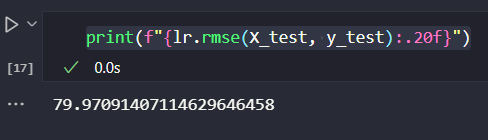



#### Có thể thấy rằng sau khi chuẩn hóa dữ liệu về dạng Standard Normal Distribution thì khi tính Root Mean Square Error (RMSE) sẽ nhỏ hơn so với RMSE của dữ liệu trước khi chuẩn hóa.